# Plotting some results again

In [1]:
import pandas as pd 
import ROOT
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.18/04


In [2]:
model_outputs = pd.read_csv('model_outputs.csv')
model_outputs.head()

,Predictions_DNN,Predictions_BDT,Predictions,EventId
0,0.418396,0.419011,0.372559,100000
1,0.114123,0.177288,0.104064,100001
2,0.076070,0.157002,0.089056,100002
3,0.071390,0.085830,0.071402,100003
4,0.151324,0.069485,0.083841,100004


In [3]:
model_outputs['Label'] = pd.read_csv('dataset_higgs_challenge.csv')['Label']
model_outputs['KaggleWeight'] = pd.read_csv('dataset_higgs_challenge.csv')['KaggleWeight']
model_outputs['KaggleSet'] = pd.read_csv('dataset_higgs_challenge.csv')['KaggleSet']

In [4]:
model_outputs.head()

,Predictions_DNN,Predictions_BDT,Predictions,EventId,Label,KaggleWeight,KaggleSet
0,0.418396,0.419011,0.372559,100000,s,0.002653,t
1,0.114123,0.177288,0.104064,100001,b,2.233584,t
2,0.076070,0.157002,0.089056,100002,b,2.347389,t
3,0.071390,0.085830,0.071402,100003,b,5.446378,t
4,0.151324,0.069485,0.083841,100004,b,6.245333,t


In [5]:
predictions_train = model_outputs['Predictions'][model_outputs['KaggleSet'] == 't']
predictions_test = model_outputs['Predictions'][model_outputs['KaggleSet'] == 'v']

weights_train = model_outputs['KaggleWeight'][model_outputs['KaggleSet'] == 't']
weights_test = model_outputs['KaggleWeight'][model_outputs['KaggleSet'] == 'v']
                             
labels_train = model_outputs['Label'][model_outputs['KaggleSet'] == 't']
labels_test = model_outputs['Label'][model_outputs['KaggleSet'] == 'v']

Rescale to (0,1):

In [6]:
predictions_train = (predictions_train - min(predictions_train)) / (max(predictions_train) - min(predictions_train))
predictions_test = (predictions_test - min(predictions_test)) / (max(predictions_test) - min(predictions_test))

In [7]:
train_signal = predictions_train[model_outputs['KaggleSet'] == 't'][model_outputs['Label']=='s']
train_bkg = predictions_train[model_outputs['KaggleSet'] == 't'][model_outputs['Label']=='b']

test_signal = predictions_test[model_outputs['KaggleSet'] == 'v'][model_outputs['Label']=='s']
test_bkg = predictions_test[model_outputs['KaggleSet'] == 'v'][model_outputs['Label']=='b']

In [8]:
weights_train_signal = model_outputs['KaggleWeight'][model_outputs['KaggleSet'] == 't'][model_outputs['Label']=='s']
weights_train_bkg = model_outputs['KaggleWeight'][model_outputs['KaggleSet'] == 't'][model_outputs['Label']=='b']

weights_test_signal = model_outputs['KaggleWeight'][model_outputs['KaggleSet'] == 'v'][model_outputs['Label']=='s']
weights_test_bkg = model_outputs['KaggleWeight'][model_outputs['KaggleSet'] == 'v'][model_outputs['Label']=='b']

Some Style settings:


In [9]:
ROOT.gROOT.SetStyle("ATLAS")

In [10]:
c = ROOT.TCanvas("c", "", 750, 700)
#c = ROOT.TCanvas("c", "", 1000, 900)

# pad = ROOT.TPad("upper_pad", "", 0, 0, 1, 1)

# pad.SetLeftMargin(0.14)
# pad.SetRightMargin(0.05)
# pad.SetTickx(True)
# pad.SetTicky(True)
# pad.SetBottomMargin(0)
# pad.SetTopMargin(0)

In [11]:
bins = 20

hist_train_s = ROOT.TH1D("hist_train_s", "train signal", bins, 0, 1)
hist_test_s = ROOT.TH1D("hist_test_s", "test signal", bins, 0, 1)
hist_train_b = ROOT.TH1D("hist_train_b", "train bkg", bins, 0, 1)
hist_test_b = ROOT.TH1D("hist_test_b", "test bkg", bins, 0, 1)

### First unweighted and normalized to unity:

In [12]:
for i in range(len(train_signal)):
    hist_train_s.Fill(train_signal.values[i])
for i in range(len(test_signal)):
    hist_test_s.Fill(test_signal.values[i])
for i in range(len(train_bkg)):
    hist_train_b.Fill(train_bkg.values[i])
for i in range(len(test_bkg)):
    hist_test_b.Fill(test_bkg.values[i])
    
    
for hist in [hist_test_s, hist_test_b]:
    for i in range(1, hist.GetNbinsX()+1):
        hist.SetBinError(i, np.sqrt(hist.GetBinContent(i)))

for hist in [hist_train_s, hist_test_s, hist_train_b, hist_test_b]:
    hist.Scale(1/hist.Integral(), 'nosw2')

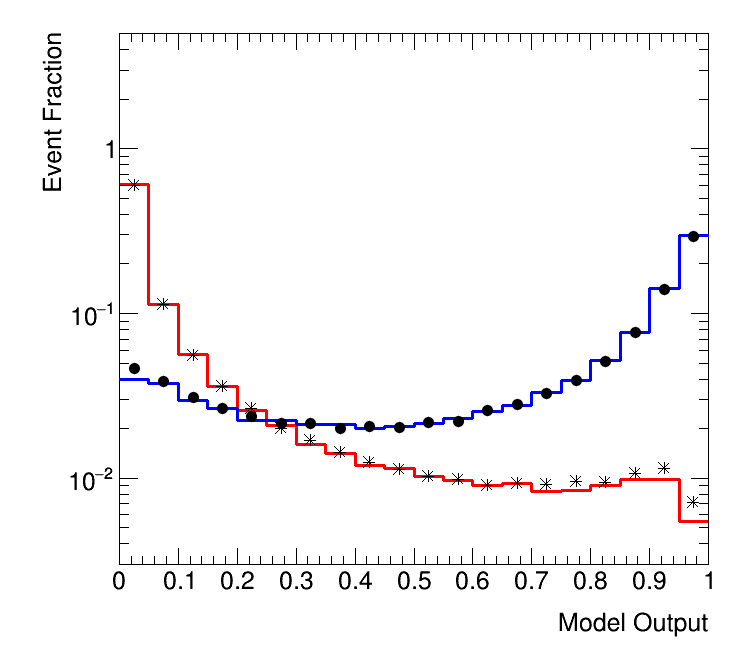

In [13]:
hist_train_b.SetAxisRange(3e-3, 5, 'Y')
hist_train_b.GetYaxis().SetLabelSize(0.04)
hist_train_b.GetYaxis().SetTitleSize(0.04)
hist_train_b.GetYaxis().SetTitle('Event Fraction')
hist_train_b.GetXaxis().SetLabelSize(0.04)
hist_train_b.GetXaxis().SetTitleSize(0.04)
hist_train_b.GetXaxis().SetTitle('Model Output')
hist_train_b.SetLineColor(ROOT.kRed)
hist_train_b.SetLineWidth(3)
hist_train_b.Draw('HIST')

hist_test_b.SetMarkerSize(1.3)
hist_test_b.SetMarkerStyle(3) ####### please try 70 or 88
hist_test_b.Draw('same')

hist_train_s.SetLineColor(ROOT.kBlue)
hist_train_s.SetLineWidth(3)
hist_train_s.Draw('hist same')

hist_test_s.SetMarkerSize(1.3)
hist_test_s.SetMarkerStyle(8)
hist_test_s.Draw('same')

c.SetLogy()
c.Draw()

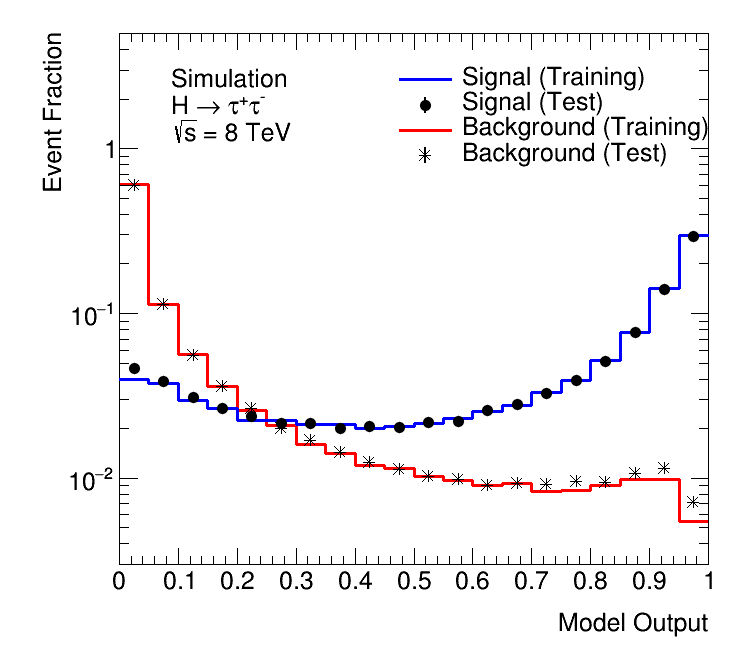

In [14]:
legend = ROOT.TLegend(0.52, 0.75, 0.92, 0.9)
legend.SetTextFont(42)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.SetTextAlign(12)
legend.AddEntry(hist_train_s, "Signal (Training)", "lf")
legend.AddEntry(hist_test_s, "Signal (Test)", "pe")
legend.AddEntry(hist_train_b, "Background (Training)" ,"l")
legend.AddEntry(hist_test_b, "Background (Test)", "ep")
legend.Draw("SAME")


text = ROOT.TLatex()
text.SetNDC() #sets coordinates to [0,1]
text.SetTextFont(42)
text.SetTextSize(0.04)
text.DrawLatex(0.23, 0.87, "Simulation")
text.DrawLatex(0.23, 0.83, "H #rightarrow #tau^{+}#tau^{-}")
text.DrawLatex(0.23, 0.79, "#sqrt{s} = 8 TeV");

c.Draw()

In [15]:
# c.SaveAs('normalized.pdf')
# c.SaveAs('normalized.png')

In [16]:
# normalized_file = ROOT.TFile('normalized.root', 'recreate')
# c.Write()
# normalized_file.Close()

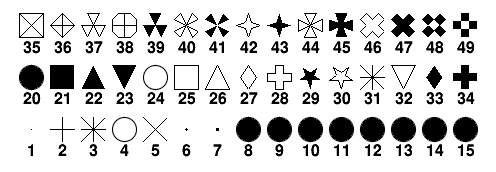

In [17]:
marker_types = ROOT.TCanvas('marker_types', '', 0,0,500,200)
marker = ROOT.TMarker()
marker.DisplayMarkerTypes()
marker_types.Draw()

### Now the weighted distribution:

In [18]:
c2 = ROOT.TCanvas("c2", "", 750, 700)
#c = ROOT.TCanvas("c", "", 1000, 900)

# pad = ROOT.TPad("upper_pad", "", 0, 0, 1, 1)

# pad.SetLeftMargin(0.14)
# pad.SetRightMargin(0.05)
# pad.SetTickx(True)
# pad.SetTicky(True)
# pad.SetBottomMargin(0)
# pad.SetTopMargin(0)

In [19]:
bins = 10

hist_train_sw = ROOT.TH1D("hist_train_sw", "train signal", bins, 0, 1)
hist_train_bw = ROOT.TH1D("hist_train_bw", "train bkg", bins, 0, 1)
hist_test_w = ROOT.TH1D("hist_test_w", "test bkg", bins, 0, 1)

In [20]:
for i in range(len(train_signal)):
    hist_train_sw.Fill(train_signal.values[i], weights_train_signal.values[i])
for i in range(len(train_bkg)):
    hist_train_bw.Fill(train_bkg.values[i], weights_train_bkg.values[i])
for i in range(len(predictions_test)):
    hist_test_w.Fill(predictions_test.values[i], weights_test.values[i])
    
    
for hist in [hist_train_sw, hist_train_bw, hist_test_w]:
    for i in range(1, hist.GetNbinsX()+1):
        hist.SetBinError(i, np.sqrt(hist.GetBinContent(i)))

In [21]:
hist_train_sw.SetFillColorAlpha(ROOT.kAzure-1,.6)
hist_train_bw.SetFillColorAlpha(ROOT.kRed-4, .9)
hist_train_sw.SetLineWidth(1)
hist_train_bw.SetLineWidth(1)

################# Axes ###################
hist_train_bw.GetYaxis().SetLabelSize(0.04)
hist_train_bw.GetYaxis().SetTitleSize(0.04)
hist_train_bw.GetYaxis().SetTitle('Events')
hist_train_bw.GetXaxis().SetLabelSize(0.04)
hist_train_bw.GetXaxis().SetTitleSize(0.04)
hist_train_bw.GetXaxis().SetTitle('Model Output')
hist_train_bw.Draw()

################## Stack #################
hs = ROOT.THStack("hs", "Weighted Distributions")
hs.Add(hist_train_sw)
hs.Add(hist_train_bw)
hs.SetMinimum(20)
hs.SetMaximum(1e7)
hs.Draw('hist')                  ####### without 'hist' it does not paint the fill colors?!
hs.SetHistogram(hist_train_bw)   ########## then it draws the axis titles, but also sets hist to none type?!

hist_test_w.Draw('same')

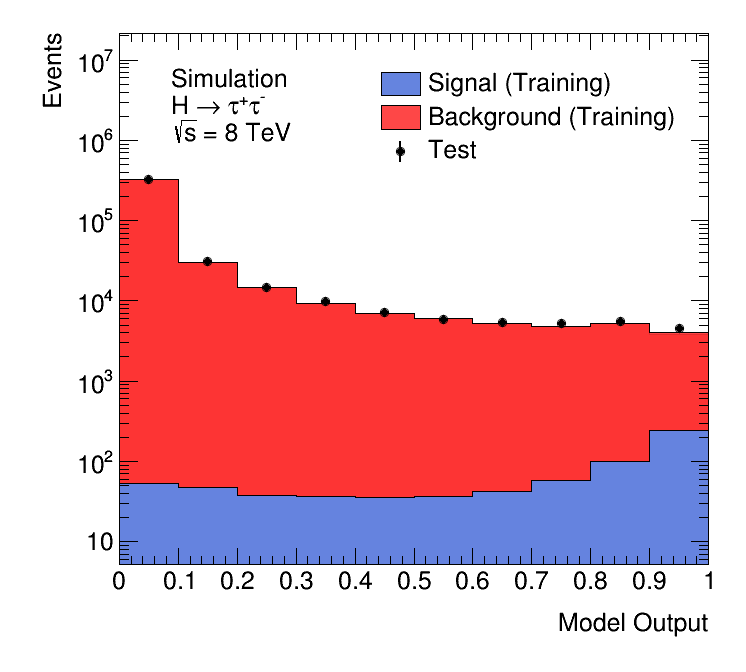

In [22]:
################ Legend ####################
legend = ROOT.TLegend(0.5, 0.75, 0.8, 0.9)
legend.SetTextFont(42)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.SetTextAlign(12)
legend.AddEntry(hist_train_sw, "Signal (Training)", "f")
legend.AddEntry(hist_train_bw, "Background (Training)", "f")
legend.AddEntry(hist_test_w, "Test", "pe")
legend.Draw("SAME")

################ Text ####################
text = ROOT.TLatex()
text.SetNDC() #sets coordinates to [0,1]
text.SetTextFont(42)
text.SetTextSize(0.04)
text.DrawLatex(0.23, 0.87, "Simulation")
text.DrawLatex(0.23, 0.83, "H #rightarrow #tau^{+}#tau^{-}")
text.DrawLatex(0.23, 0.79, "#sqrt{s} = 8 TeV")


c2.SetLogy()
c2.Draw()

In [23]:
c2.SaveAs('weighted.png')
c2.SaveAs('weighted.pdf')

Info in <TCanvas::Print>: png file weighted.png has been created
Info in <TCanvas::Print>: pdf file weighted.pdf has been created


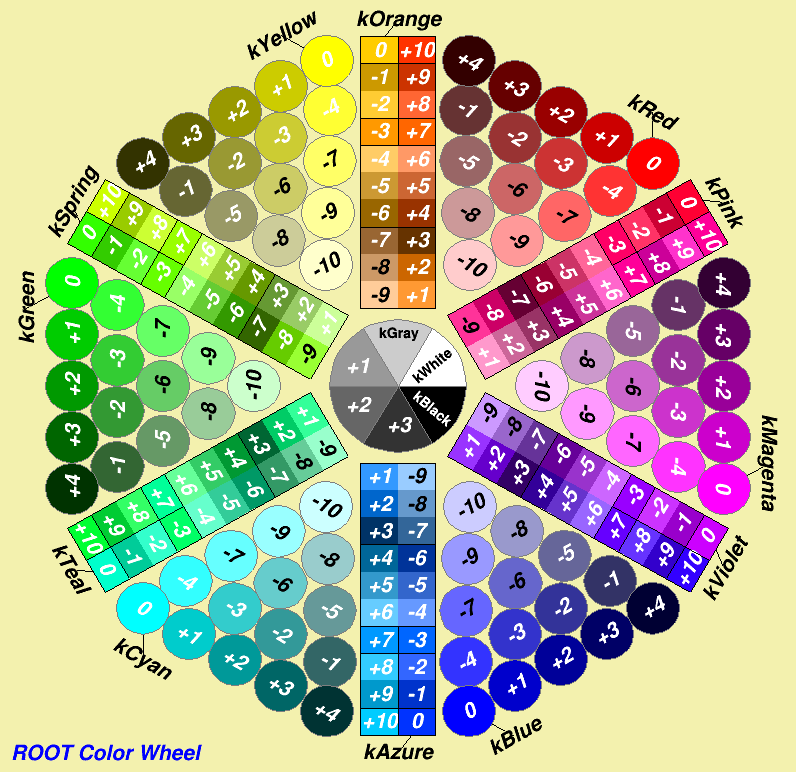

In [24]:
w = ROOT.TColorWheel()
cw = ROOT.TCanvas("cw","cw",0,0,800,800)
w.SetCanvas(cw)
w.Draw()
cw.Draw()

# Ratio Plot

In [116]:
bins = 10

hist_train_sw = ROOT.TH1D("hist_train_sw", "train signal", bins, 0, 1)
hist_train_bw = ROOT.TH1D("hist_train_bw", "train bkg", bins, 0, 1)
hist_test_w = ROOT.TH1D("hist_test_w", "test bkg", bins, 0, 1)

Warning in <TROOT::Append>: Replacing existing TH1: hist_train_sw (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_train_bw (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_train_bw (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_test_w (Potential memory leak).


In [117]:
for i in range(len(train_signal)):
    hist_train_sw.Fill(train_signal.values[i], weights_train_signal.values[i])
for i in range(len(train_bkg)):
    hist_train_bw.Fill(train_bkg.values[i], weights_train_bkg.values[i])
for i in range(len(predictions_test)):
    hist_test_w.Fill(predictions_test.values[i], weights_test.values[i])
    
    
for hist in [hist_train_sw, hist_train_bw, hist_test_w]:
    for i in range(1, hist.GetNbinsX()+1):
        hist.SetBinError(i, np.sqrt(hist.GetBinContent(i)))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


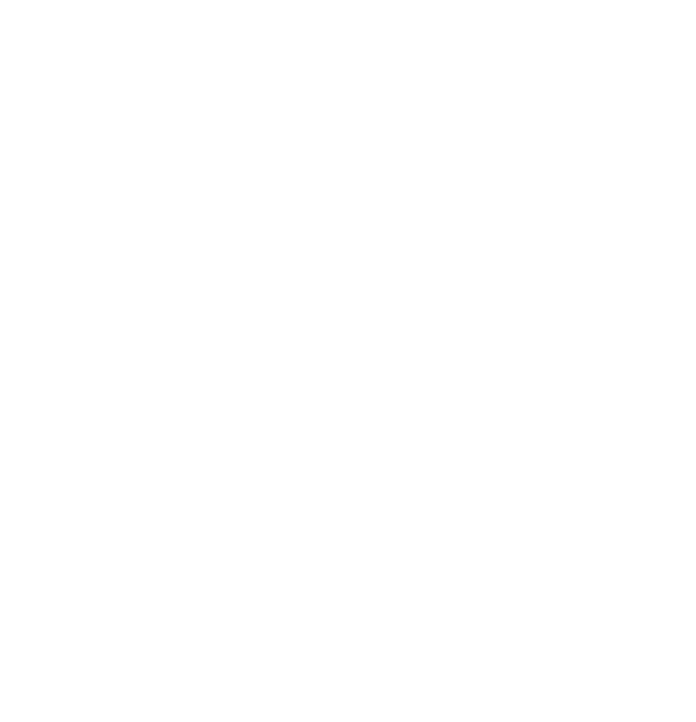

In [126]:
c3 = ROOT.TCanvas("c3", "Ratio Plot", 700, 750)

upper_pad = ROOT.TPad("upper_pad", "", 0, 0.25, 1, 1)
lower_pad = ROOT.TPad("lower_pad", "", 0, 0, 1, 0.25)
for pad in [upper_pad, lower_pad]:
    pad.SetLeftMargin(0.14)
    pad.SetRightMargin(0.05)
    pad.SetTickx(True)
    pad.SetTicky(True)
upper_pad.SetBottomMargin(0)
lower_pad.SetTopMargin(0)
lower_pad.SetBottomMargin(0.3)

upper_pad.Draw()
lower_pad.Draw()
c3.Draw()

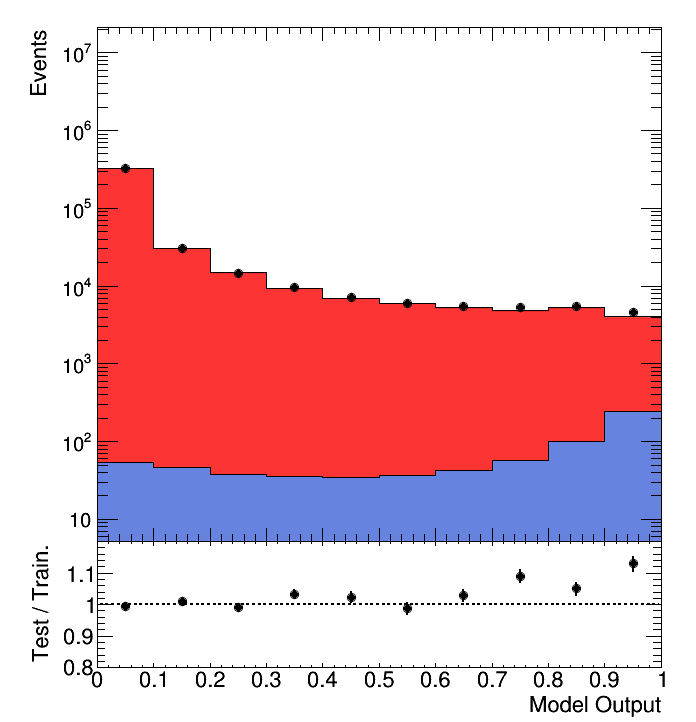

In [138]:
upper_pad.cd()

hist_train_sw.SetFillColorAlpha(ROOT.kAzure-1,.6)
hist_train_bw.SetFillColorAlpha(ROOT.kRed-4, .9)
hist_train_sw.SetLineWidth(1)
hist_train_bw.SetLineWidth(1)

################# Axes ###################
hist_train_bw.GetYaxis().SetLabelSize(0.04)
hist_train_bw.GetYaxis().SetTitleSize(0.045)
hist_train_bw.GetYaxis().SetTitle('Events')
hist_train_bw.GetYaxis().SetTitleOffset(1.2)
hist_train_bw.GetXaxis().SetLabelSize(0.04)
hist_train_bw.GetXaxis().SetTitleSize(0.04)
hist_train_bw.GetXaxis().SetTitle('Model Output')
hist_train_bw.Draw()

################## Stack #################
hs = ROOT.THStack("hs", "Weighted Distributions")
hs.Add(hist_train_sw)
clone = hist_train_bw.Clone()
hs.Add(clone)
hs.SetMinimum(20)
hs.SetMaximum(1e7)
hs.Draw('hist')                  ####### without 'hist' it does not paint the fill colors?!
hs.SetHistogram(clone)   ########## then it draws the axis titles, but also sets hist to none type?! thats why clone
  
hist_test_w.Draw('same')

upper_pad.SetLogy()
c3.Draw()

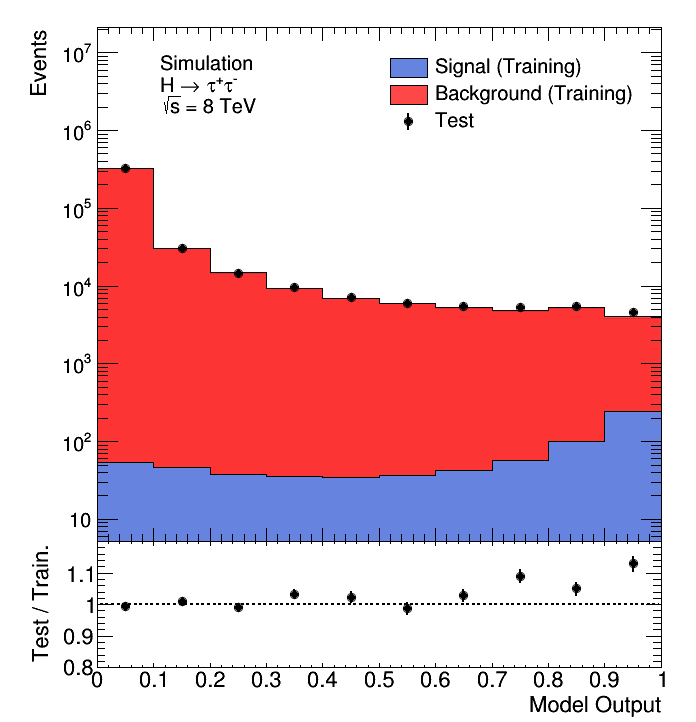

In [139]:
################ Legend ####################
legend = ROOT.TLegend(0.55, 0.75, 0.85, 0.9)
legend.SetTextFont(42)
legend.SetFillStyle(0)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.SetTextAlign(12)
legend.AddEntry(hist_train_sw, "Signal (Training)", "f")
legend.AddEntry(hist_train_bw, "Background (Training)", "f")
legend.AddEntry(hist_test_w, "Test", "pe")
legend.Draw("SAME")

################ Text ####################
text = ROOT.TLatex()
text.SetNDC() #sets coordinates to [0,1]
text.SetTextFont(42)
text.SetTextSize(0.04)
text.DrawLatex(0.23, 0.87, "Simulation")
text.DrawLatex(0.23, 0.83, "H #rightarrow #tau^{+}#tau^{-}")
text.DrawLatex(0.23, 0.79, "#sqrt{s} = 8 TeV")

c3.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: ratio (Potential memory leak).


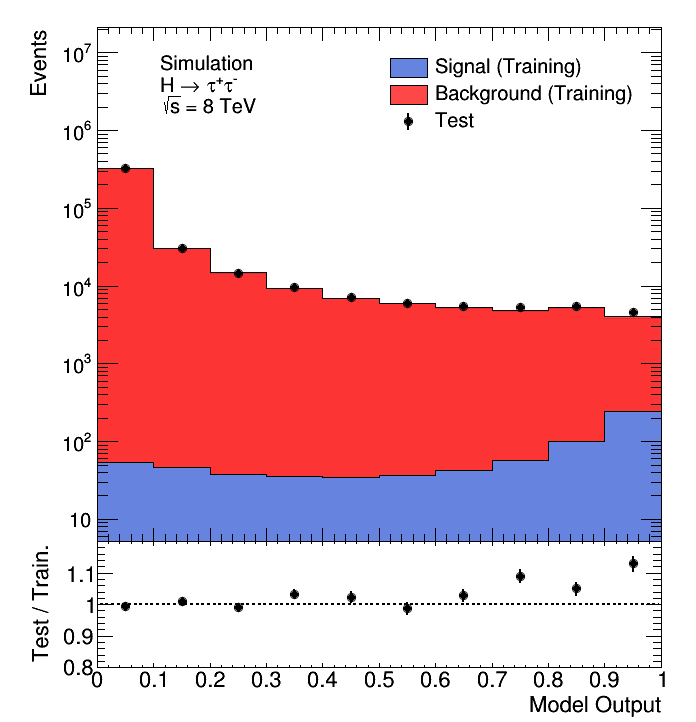

In [140]:
lower_pad.cd()

############ print line at 1 #################
one = ROOT.TF1("one", "1", 0,1) 
one.SetLineColor(1)
one.SetLineStyle(2)
one.SetLineWidth(2)
one.SetMinimum(.8)
one.SetMaximum(1.2)
one.GetXaxis().SetLabelSize(0.13)
one.GetXaxis().SetTitleSize(0.13)
one.GetXaxis().SetTitleOffset(1.0)
one.GetYaxis().SetLabelSize(0.13)
one.GetYaxis().SetTitleSize(0.13)
one.GetYaxis().SetTitle("Test / Train.")
one.GetYaxis().CenterTitle()
one.GetYaxis().SetTitleOffset(0.4)
one.GetYaxis().SetNdivisions(504, False)
one.GetYaxis().ChangeLabel(-1, -1, 0)
one.GetXaxis().SetTitle("Model Output")
one.Draw()

################## add ratio ##########################
training_b = hs.GetHists().At(1).Clone() ####### get hists back from stacked hist
training_s = hs.GetHists().At(0).Clone()
training_b.Add(training_s)

ratio = ROOT.TH1F("ratio", "ratio", bins, 0, 1)
ratio.SetLineColor(1)
ratio.SetLineStyle(1)
ratio.SetLineWidth(2)
ratio.Add(hist_test_w)
ratio.Divide(training_b) ########## makes ratio of test over training 
ratio.Draw("SAME")


c3.Draw()

In [141]:
c3.SaveAs('ratioplot.png')
c3.SaveAs('ratioplot.pdf')

Info in <TCanvas::Print>: png file ratioplot.png has been created
Info in <TCanvas::Print>: pdf file ratioplot.pdf has been created
